# Proyecto del Día 9: Consulta de Temperaturas Interactivo por Ciudad y Mes (solución)

## Objetivo

El proyecto propuesto consistirá en la creación de un programa interactivo para la visualización de datos meteorológicos. Este programa permitirá a los usuarios visualizar los registros climáticos eligiendo el lugar y el més. El objetivo es aplicar los conceptos de creación de gráficos, personalización de estilos y combinarlo con las habilidades de desarrollo de programas con Python.

## Consigna

1. **Cargar un DataFrame** con los datos meteorológicos provistos en el archivo descargable de esta lección.
2. Asegúrate de que las **fechas** estén en el **formato correcto** para su manipulación posterior.
3. Crea un programa (una función o un conjunto de funciones) que le pida al usuario que seleccione una **ciudad** de la lista de ciudades disponibles en nuestro DataFrame, y un **mes** del año.
4. Muéstrale al usuario un gráfico que muestre las temperaturas mínimas y máximas que se registraron en la ciudad elegida durante el mes elegido.
5. El programa debe preguntarle al usuario si desea seguir haciendo consultas o no.

**¡Mucha suerte!**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
ruta = "C:/Users/leomendez/OneDrive/Documentos/Python Scripts/Python para Data Science & Machine Learning en 18 Días/Datos+Meteorológicos_Arg_2023.csv"
df = pd.read_csv(ruta)
df.head()

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,1/1/2023,Buenos Aires,27,18,0.0,22.7,68.8
1,1/1/2023,Cordoba,35,18,0.0,33.8,61.7
2,1/1/2023,Rosario,23,21,0.0,10.6,80.0
3,1/1/2023,Mendoza,35,21,0.0,23.8,76.8
4,1/1/2023,Tucuman,36,18,17.2,25.7,54.9


In [12]:
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y')
df.head()

,Fecha,Ciudad,Temperatura Maxima,Temperatura Minima,Precipitacion,Velocidad del Viento,Humedad Relativa
0,2023-01-01,Buenos Aires,27,18,0.0,22.7,68.8
1,2023-01-01,Cordoba,35,18,0.0,33.8,61.7
2,2023-01-01,Rosario,23,21,0.0,10.6,80.0
3,2023-01-01,Mendoza,35,21,0.0,23.8,76.8
4,2023-01-01,Tucuman,36,18,17.2,25.7,54.9


In [13]:
lista_ciudades = []

for c in df['Ciudad']:
    if c not in lista_ciudades:
        lista_ciudades.append(c)

lista_ciudades

['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']

In [14]:
dict_meses = {1: 'Enero',
             2: 'Febrero',
             3: 'Marzo',
             4: 'Abril',
             5: 'Mayo',
             6: 'Junio',
             7: 'Julio',
             8: 'Agosto',
             9: 'Septiembre',
             10: 'Octubre',
             11: 'Noviembre',
             12: 'Diciembre'}

In [15]:
def consultar_temperaturas():
    while True:
        # solicitar la ciudad
        print("\nCiudades disponibles: ", lista_ciudades)
        ciudad_elegida = input("Elija la ciudad de la lista: ").title()
        
        # Solicitar el mes
        mes_elegido = int(input("Elija un número de mes (por ej. Enero = 1): "))
        
        # validar los inputs
        if ciudad_elegida not in lista_ciudades or mes_elegido not in range(1, 13):
            print("Ciudad o mes no válidos. Inténtale nuevamente.")
            continue
        
        # Crear el datafreme filtrado
        datos_ciudad_mes = df[(df['Ciudad'] == ciudad_elegida) & (df['Fecha'].dt.month == mes_elegido)]
        
        # Graficamos las temperaturas del dataframe
        plt.figure(figsize=(10, 6))
        plt.plot(datos_ciudad_mes['Fecha'], datos_ciudad_mes['Temperatura Maxima'], label="Maxima", color="red")
        plt.plot(datos_ciudad_mes['Fecha'], datos_ciudad_mes['Temperatura Minima'], label="Minima", color="blue")
        plt.title(f"Temperaturas en {ciudad_elegida} durante el mes de {dict_meses[mes_elegido]}")
        plt.xlabel("Fecha")
        plt.ylabel("Temperaturas")
        plt.legend()
        plt.xticks(rotation=45)
        plt.show()
        
        # Preguntar al usuario si quiere continuar
        otra_consulta = input("¿Deseas continuar consultando? (s/n): ")
        if otra_consulta.lower() != 's':
            break


Ciudades disponibles:  ['Buenos Aires', 'Cordoba', 'Rosario', 'Mendoza', 'Tucuman']


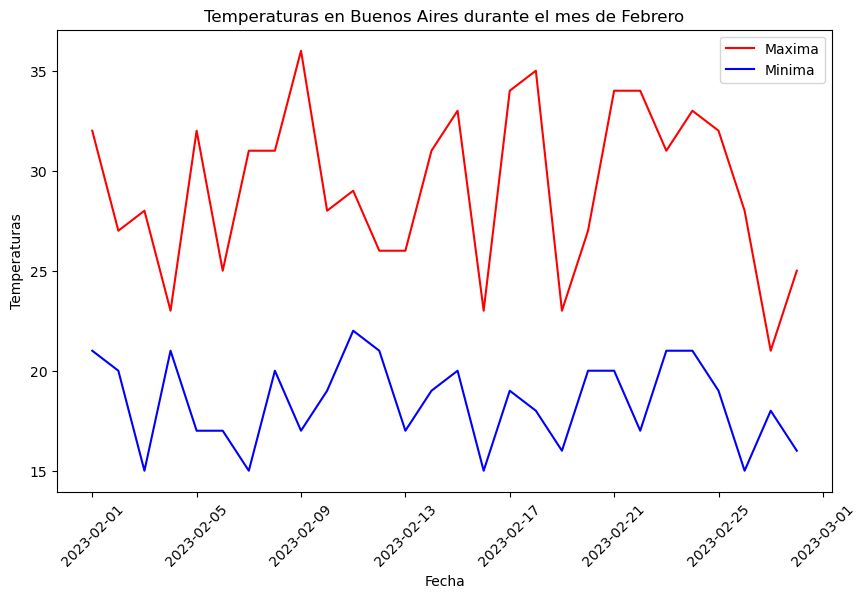

In [16]:
consultar_temperaturas()